In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
# Suppress FutureWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/siddhantbhattarai/Machine_Learning_Bootcamp_2024/refs/heads/main/Datasets/california_housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
data.shape

(17000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
print("The number of duplicated data is: ",data.duplicated().sum())

The number of duplicated data is:  0


In [6]:
print("The number of null values in dataset is: \n",data.isnull().sum())

The number of null values in dataset is: 
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [9]:
# 2. Feature Engineering
# Create new features
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

In [10]:
# Drop less informative columns
X = data.drop(columns=['median_house_value', 'total_rooms', 'total_bedrooms', 'population'])
y = data['median_house_value']

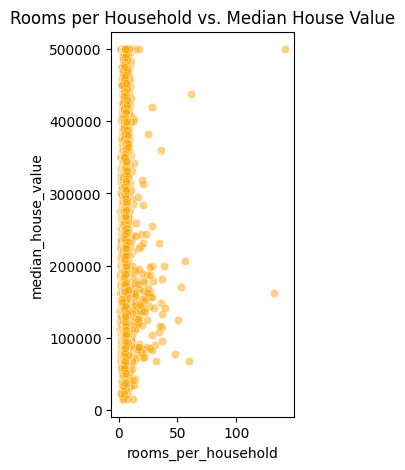

In [11]:
# Scatter plot for rooms_per_household vs median_house_value
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 2)
sns.scatterplot(x='rooms_per_household', y='median_house_value', data=data, alpha=0.5, color='orange')
plt.title('Rooms per Household vs. Median House Value')
plt.show()

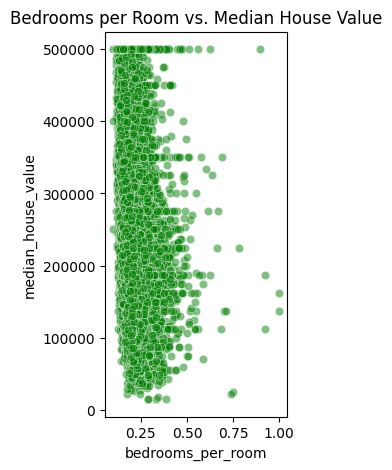

In [12]:
# Scatter plot for bedrooms_per_room vs median_house_value
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 3)
sns.scatterplot(x='bedrooms_per_room', y='median_house_value', data=data, alpha=0.5, color='green')
plt.title('Bedrooms per Room vs. Median House Value')
plt.show()

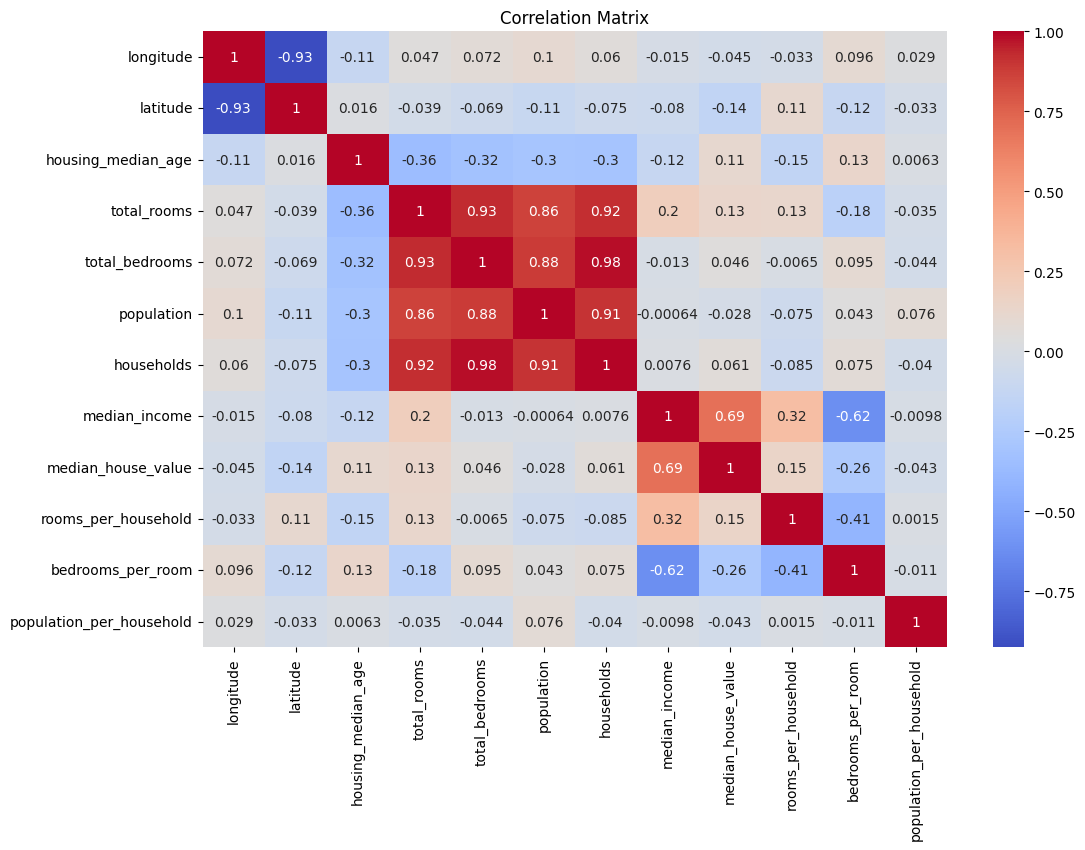

In [13]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

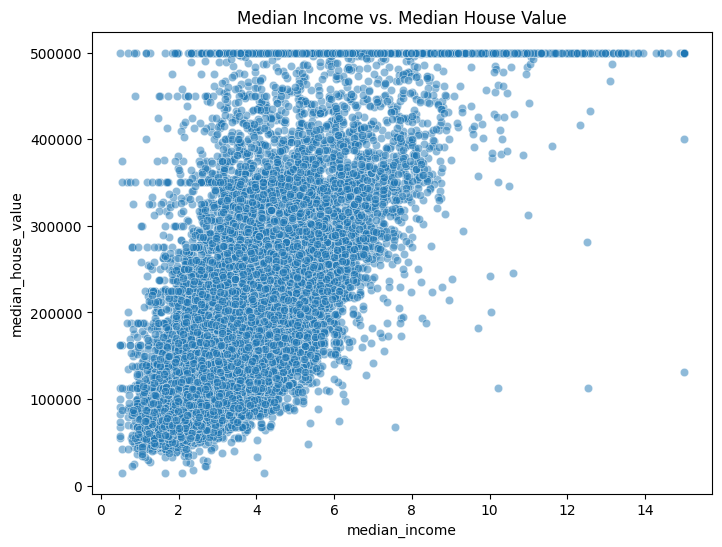

In [14]:
# Scatter plot: Median Income vs. Median House Value
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data, alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.show()

In [15]:
# Data Preprocessing
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

In [16]:
# **Imputation for Missing Values**
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [17]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(random_state=42)
}

In [22]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mae, mse, rmse, r2

In [23]:
# Initialize an empty list to store results
results_list = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    mae, mse, rmse, r2 = evaluate_model(model, X_test_scaled, y_test)
    
    # Append the results as a dictionary to the list
    results_list.append({
        "Model": model_name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })

# Convert the list of results into a DataFrame
results = pd.DataFrame(results_list)

In [24]:
# 9. Convert to DataFrame and display results
results = pd.DataFrame(results_list)
print("\nModel Performance:")
print(results)


Model Performance:
               Model           MAE           MSE          RMSE  R2 Score
0  Linear Regression  49205.626751  4.552463e+09  67471.942597  0.669605
1      Decision Tree  44965.311765  4.932316e+09  70230.450049  0.642037
2      Random Forest  33065.169256  2.554471e+09  50541.770563  0.814609
3            XGBoost  31881.716026  2.259223e+09  47531.280193  0.836037


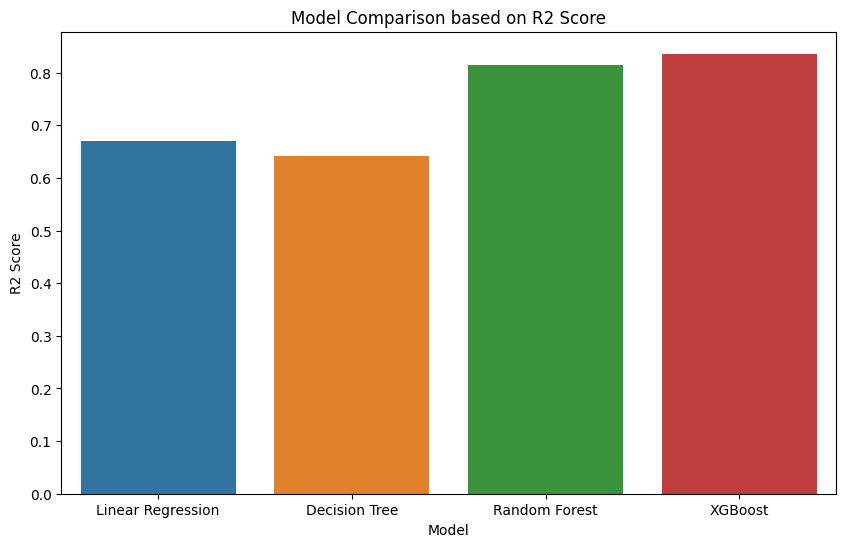

In [25]:
# 10. Visualize Model Performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2 Score", data=results, hue="Model", dodge=False, legend=False)
plt.title('Model Comparison based on R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.show()


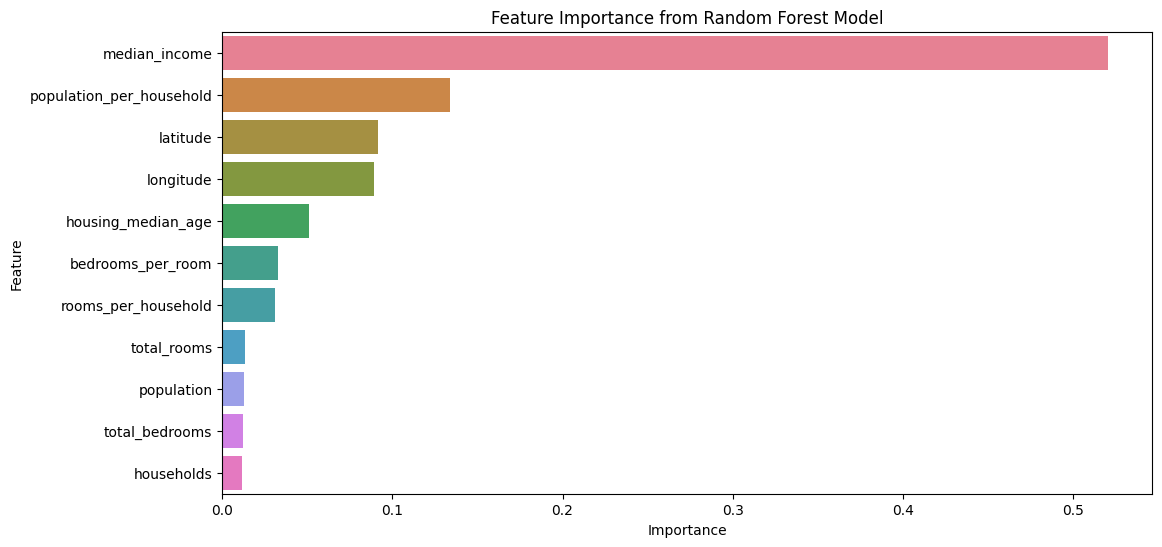

In [26]:
# 11. Visualizing Feature Importance (Random Forest)
feature_names = X.columns
random_forest = models["Random Forest"]
importances = random_forest.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', dodge=False, legend=False)
plt.title('Feature Importance from Random Forest Model')
plt.show()

Let's evaluate the performance metrics you provided for the four models (Linear Regression, Decision Tree, Random Forest, and XGBoost) on **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **\( R^2 \) Score**.

### Summary of Model Results

| Model               | MAE          | RMSE          | R² Score |
|---------------------|--------------|---------------|----------|
| Linear Regression   | 49,205.63    | 67,471.94     | 0.6696   |
| Decision Tree       | 44,965.31    | 70,230.45     | 0.6420   |
| Random Forest       | 33,065.17    | 50,541.77     | 0.8146   |
| XGBoost             | **31,881.72**| **47,531.28** | **0.8360** |

### Metric Interpretation and Model Evaluation

1. **MAE (Mean Absolute Error)**:
   - XGBoost has the lowest MAE (31,881.72), indicating that, on average, its predictions are closest to the actual values, with Random Forest as the next best model.

2. **RMSE (Root Mean Squared Error)**:
   - RMSE values are lower for Random Forest and XGBoost, indicating that they handle larger errors more effectively. XGBoost again has the lowest RMSE (47,531.28), followed by Random Forest. 
   - Lower RMSE implies XGBoost’s predictions are more accurate and closer to the true house prices than other models.

3. **R² Score (Coefficient of Determination)**:
   - XGBoost achieved the highest \( R^2 \) score (0.8360), meaning it explains around 83.6% of the variance in house prices, with Random Forest close behind at 81.5%.
   - Higher \( R^2 \) scores from Random Forest and XGBoost suggest that these models capture more of the variability in the target variable than Linear Regression and Decision Tree.

### Model Performance Summary
- **Best Overall Model**: **XGBoost** outperformed all other models, with the lowest MAE and RMSE, and the highest \( R^2 \) score. This suggests that XGBoost provides the best predictions and captures the variability in house prices effectively.
- **Runner-up Model**: **Random Forest** is also a strong performer, with slightly higher errors and slightly lower explanatory power compared to XGBoost. This model could be a good alternative if computational resources are a concern since Random Forest is generally faster to train than XGBoost.
- **Linear Regression and Decision Tree**: These models had notably higher errors and lower \( R^2 \) scores, indicating they are less suitable for this dataset. Linear Regression's simplicity might limit its ability to capture complex relationships in the data, while Decision Tree’s higher errors suggest overfitting or insufficient generalization.

### Recommendation
Given this evaluation, **XGBoost** is recommended as the best model for this dataset, due to its combination of accuracy and high explanatory power. If computational efficiency is a priority, **Random Forest** is also a solid choice with competitive performance. 

For further improvements, you could consider **hyperparameter tuning** for XGBoost or Random Forest to optimize performance even further. Let me know if you need assistance with this!